Model Testing

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd
datafix=pd.read_csv('liatduludeh.csv',sep=';')

In [ ]:
datafix['tweet'] = datafix['tweet'].str.lower()
stop = {'sekolah','online','daring','school','from','home','banget','tidak','jadi','kalau','bikin','tapi','buat','adik','murid','guru','orang','siswa','adek','biar','emang','pagi','sore','malam','siang','gini','engga','kalau','mungkin','pengen','asli','ngerasa','lain','melulu','alias','puter','yang','jadi','akibat','maka','lebih','lain','tetep','gamau','udah','pakai','gitu','adekku','adeknya','terima','systems','kayak','style','lomba','ayam','kakak','sama','class','ajar','anak','internet','wifi','pandemi','tugas','offline','protokol','kuota','teknologi','pelajaran','aspek','gaperlu','mandi','terap','teman','titik','baca','ulang','keliatan','ebook','resiko','kuliah','seneng','impian','rumah','catat','materi','ulang','buku','bangun','pikir','ngetik','semester','jadwal','adaptasi','penuh','sepenuh','hati','zoom','pakai','sumpah','selesai','kelas','masuk','minim','suka','kuat','jadwal','sistem','tatap','muka','warga','modul','kerja','video','pemerintah','sadar','percaya','temu','solusi','rekam','didik','sekolah','jalan','fasilitas','beda','daerah','sepakat','kalo','ulangan','open','book','Sekolah','ponakan','matematika','nilai','orangtua','math','science','lihat','senin','selasa','rabu','kamis','jumat','sabtu','jum\'at','minggu','zona','hijau','lupa','sarapan','kuning','program','kemdikbud','kemendikbud','ilmu','moga','semoga','lalu','gopay','saldo','beli','generasi','mood','belajar'}
datafix['tweet'] = datafix['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) and len(word)>=4]))
stop = stopwords.words('indonesian')
datafix['tweet'] = datafix['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
datatest=pd.read_csv('datatest.csv',sep=';')

In [ ]:
# extracting the number of examples of each class
POS_len = datafix[datafix['sentiment'] == 'positive'].shape[0]
NEG_len = datafix[datafix['sentiment'] == 'negative'].shape[0]
NET_len = datafix[datafix['sentiment'] == 'neutral'].shape[0]

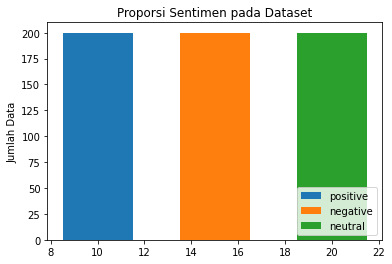

In [ ]:
# bar plot of the 3 classes
from matplotlib import pyplot as plt
plt.bar(10,POS_len,3, label="positive")
plt.bar(15,NEG_len,3, label="negative")
plt.bar(20,NET_len,3, label="neutral")
plt.legend(loc='lower right')
plt.ylabel('Jumlah Data')
plt.title('Proporsi Sentimen pada Dataset')
plt.show()

Data sudah balance - Sudah dilakukan preprocessing sebelumnya

In [ ]:
datafix.sentiment.value_counts()

negative    200
positive    200
neutral     200
Name: sentiment, dtype: int64

In [ ]:
datafix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      600 non-null    object
 1   sentiment  600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [ ]:
datafix = datafix[datafix['tweet'] != '']

In [ ]:
datafix.sentiment.value_counts()

negative    200
positive    200
neutral     200
Name: sentiment, dtype: int64

In [ ]:
datafix.count()

tweet        600
sentiment    600
dtype: int64

Model sendiri

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer

In [ ]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [ ]:
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = BernoulliNB()
clf4 = SVC()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=datafix.tweet
y=datafix.sentiment

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=225)

In [ ]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 360
Banyak data x_test  : 240
Banyak data y_train : 360
Banyak data y_test  : 240


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])
model4= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf4)])

In [ ]:
model.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shap

In [ ]:
hasil=model.predict(x_test)
hasil2=model2.predict(x_test)
hasil3=model3.predict(x_test)
hasil4=model4.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

positive    82
neutral     80
negative    78
Name: sentiment, dtype: int64

RandomForestClassifier

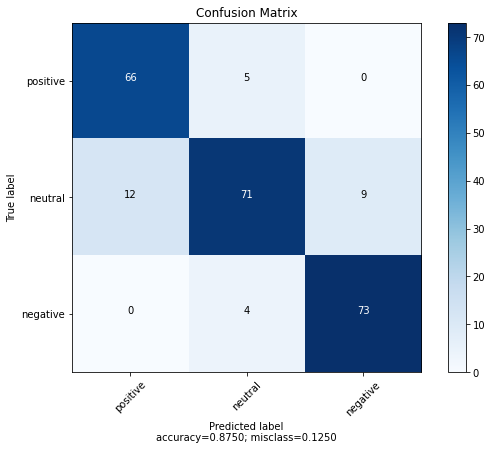

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    negative       0.93      0.85      0.89        78
     neutral       0.77      0.89      0.83        80
    positive       0.95      0.89      0.92        82

    accuracy                           0.88       240
   macro avg       0.88      0.87      0.88       240
weighted avg       0.88      0.88      0.88       240



In [ ]:
print(accuracy_score(hasil,y_test))

0.875


LogisticRegression

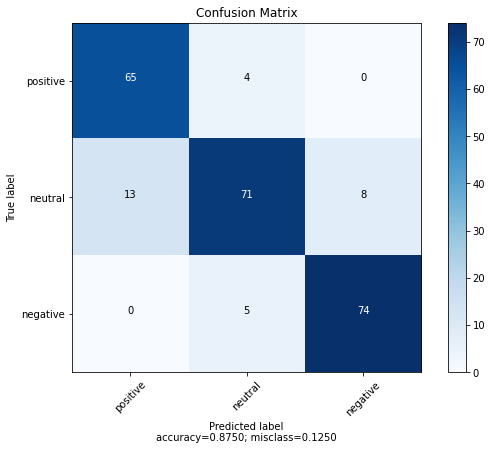

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    negative       0.94      0.83      0.88        78
     neutral       0.77      0.89      0.83        80
    positive       0.94      0.90      0.92        82

    accuracy                           0.88       240
   macro avg       0.88      0.87      0.88       240
weighted avg       0.88      0.88      0.88       240



In [ ]:
print(accuracy_score(hasil2,y_test))

0.875


BernoulliNB

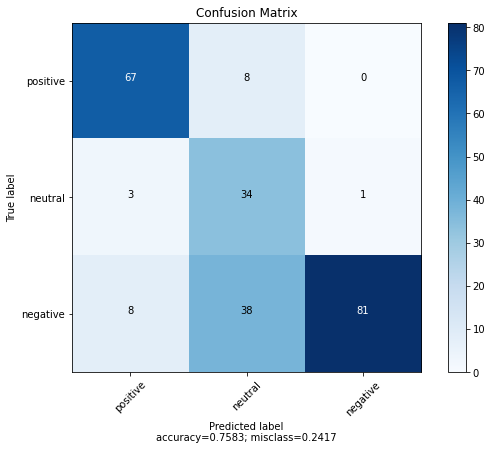

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    negative       0.89      0.86      0.88        78
     neutral       0.89      0.42      0.58        80
    positive       0.64      0.99      0.78        82

    accuracy                           0.76       240
   macro avg       0.81      0.76      0.74       240
weighted avg       0.81      0.76      0.74       240



In [ ]:
print(accuracy_score(hasil3,y_test))

0.7583333333333333


SVC

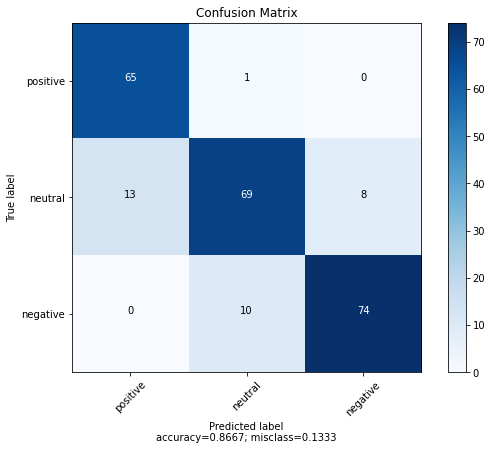

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil4,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil4)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    negative       0.98      0.83      0.90        78
     neutral       0.77      0.86      0.81        80
    positive       0.88      0.90      0.89        82

    accuracy                           0.87       240
   macro avg       0.88      0.87      0.87       240
weighted avg       0.88      0.87      0.87       240



In [ ]:
print(accuracy_score(hasil4,y_test))

0.8666666666666667


Sentiment Analysis - Logistic Regression


In [ ]:
xreal_test = datatest.tweet

In [ ]:
hasil_test=model2.predict(xreal_test)

In [ ]:
data_result = {'tweet' : datatest['tweet'].to_numpy(), 'sentiment':hasil_test}
df_result = pd.DataFrame.from_dict(data_result)

In [ ]:
df_result['tweet'] = df_result['tweet'].str.lower()
stop = {'sekolah','online','daring','school','from','home','banget','tidak','jadi','kalau','bikin','tapi','buat','adik','murid','guru','orang','siswa','adek','biar','emang','pagi','sore','malam','siang','gini','engga','kalau','mungkin','pengen','asli','ngerasa','lain','melulu','alias','puter','yang','jadi','akibat','maka','lebih','lain','tetep','gamau','udah','pakai','gitu','adekku','adeknya','terima','systems','kayak','style','lomba','ayam','kakak','sama','class','ajar','anak','internet','wifi','pandemi','tugas','offline','protokol','kuota','teknologi','pelajaran','aspek','gaperlu','mandi','terap','teman','titik','baca','ulang','keliatan','ebook','resiko','kuliah','seneng','impian','rumah','catat','materi','ulang','buku','bangun','pikir','ngetik','semester','jadwal','adaptasi','penuh','sepenuh','hati','zoom','pakai','sumpah','selesai','kelas','masuk','minim','suka','kuat','jadwal','sistem','tatap','muka','warga','modul','kerja','video','pemerintah','sadar','percaya','temu','solusi','rekam','didik','sekolah','jalan','fasilitas','beda','daerah','sepakat','kalo','ulangan','open','book','Sekolah','ponakan','matematika','nilai','orangtua','math','science','lihat','senin','selasa','rabu','kamis','jumat','sabtu','jum\'at','minggu','zona','hijau','lupa','sarapan','kuning','program','kemdikbud','kemendikbud','ilmu','moga','semoga','lalu','gopay','saldo','beli','generasi','mood','belajar'}
df_result['tweet'] = df_result['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) and len(word)>=4]))
stop = stopwords.words('indonesian')
df_result['tweet'] = df_result['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# extracting the number of examples of each class
POS_len = df_result[df_result['sentiment'] == 'positive'].shape[0]
NEG_len = df_result[df_result['sentiment'] == 'negative'].shape[0]
NET_len = df_result[df_result['sentiment'] == 'neutral'].shape[0]

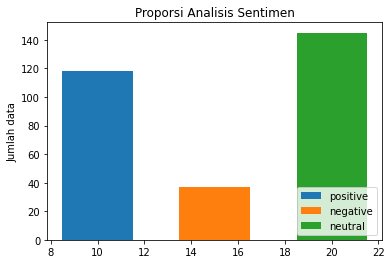

In [ ]:
# bar plot of the 3 classes
from matplotlib import pyplot as plt
plt.bar(10,POS_len,3, label="positive")
plt.bar(15,NEG_len,3, label="negative")
plt.bar(20,NET_len,3, label="neutral")
plt.legend(loc='lower right')
plt.ylabel('Jumlah data')
plt.title('Proporsi Analisis Sentimen')
plt.savefig('sentimen.png',bbox_inches='tight')
plt.show()

In [ ]:
POS_data = df_result[df_result['sentiment'] == 'positive']
NEG_data = df_result[df_result['sentiment'] == 'negative']
NET_data = df_result[df_result['sentiment'] == 'neutral']

Positive

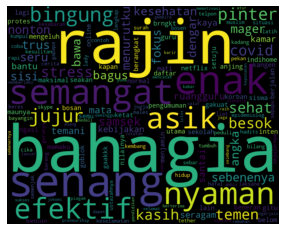

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in POS_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
positive_unigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
         
df_top_positive = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive = df_top_positive.rename(columns={0:'Word',1:'Count'})

# Bigrams
positive_bigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        positive_bigrams[word] += 1
        
df_top_positive_bi = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_bi = df_top_positive_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
positive_trigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        positive_trigrams[word] += 1
        
df_top_positive_tri = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_tri = df_top_positive_tri.rename(columns={0:'Word',1:'Count'})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


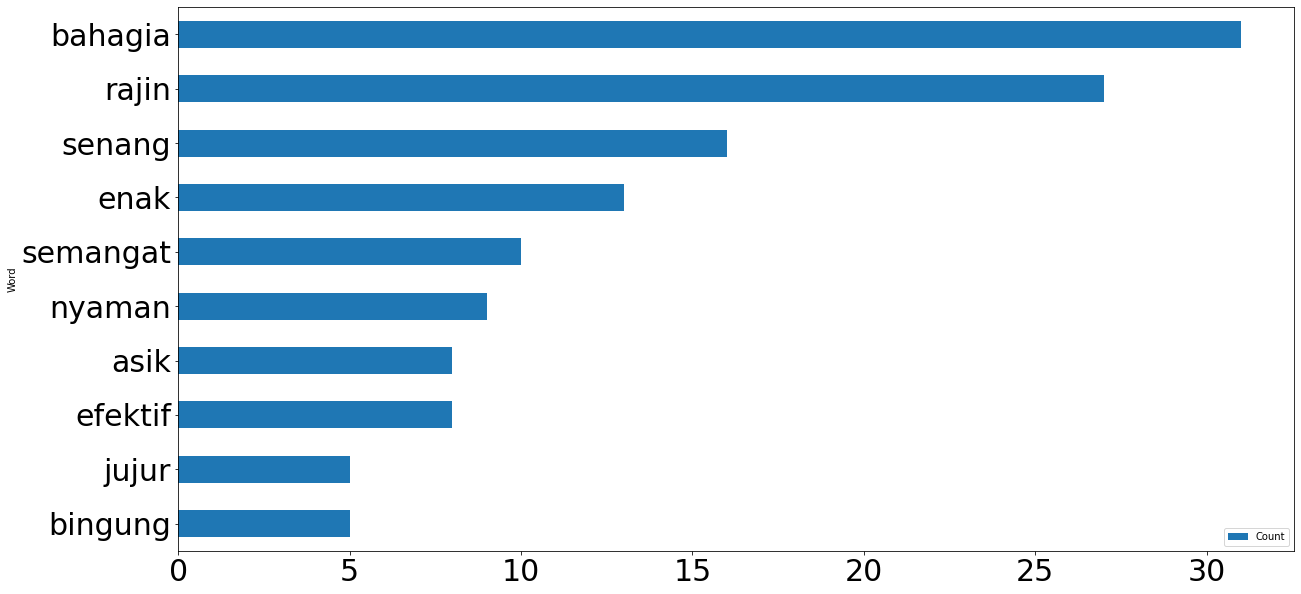

In [ ]:
df_top_positive.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('positif.png',bbox_inches='tight')

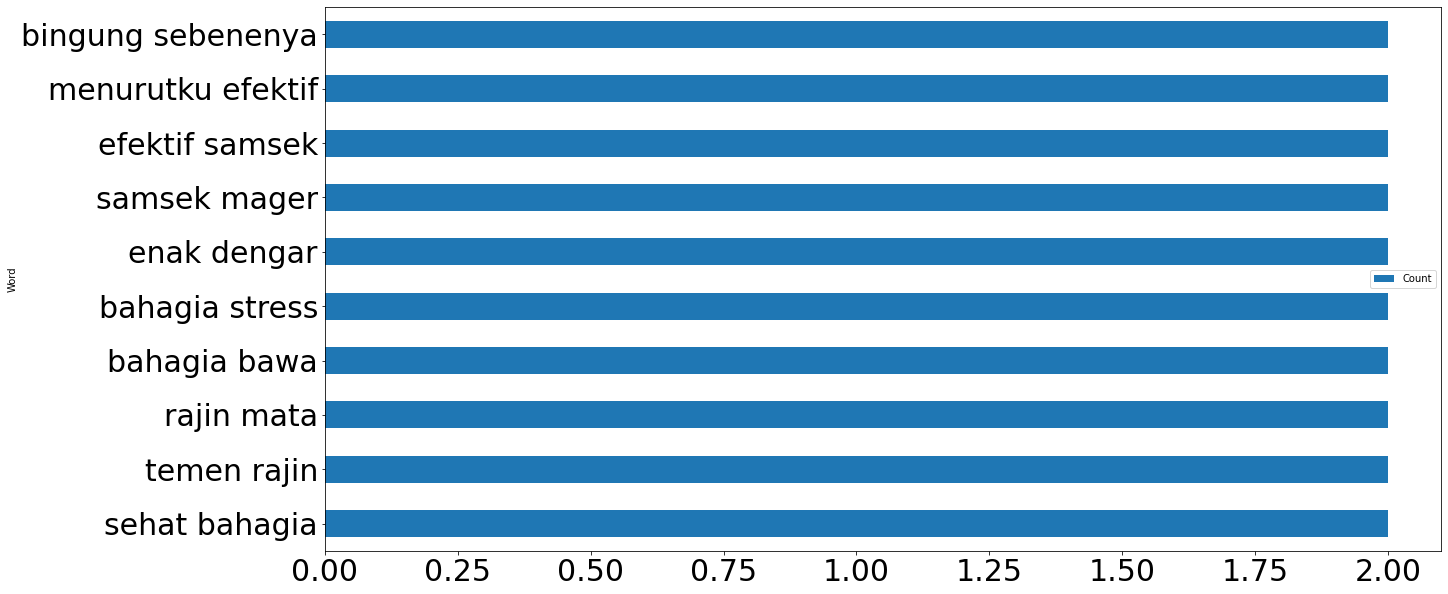

In [ ]:
df_top_positive_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('positif1.png',bbox_inches='tight')

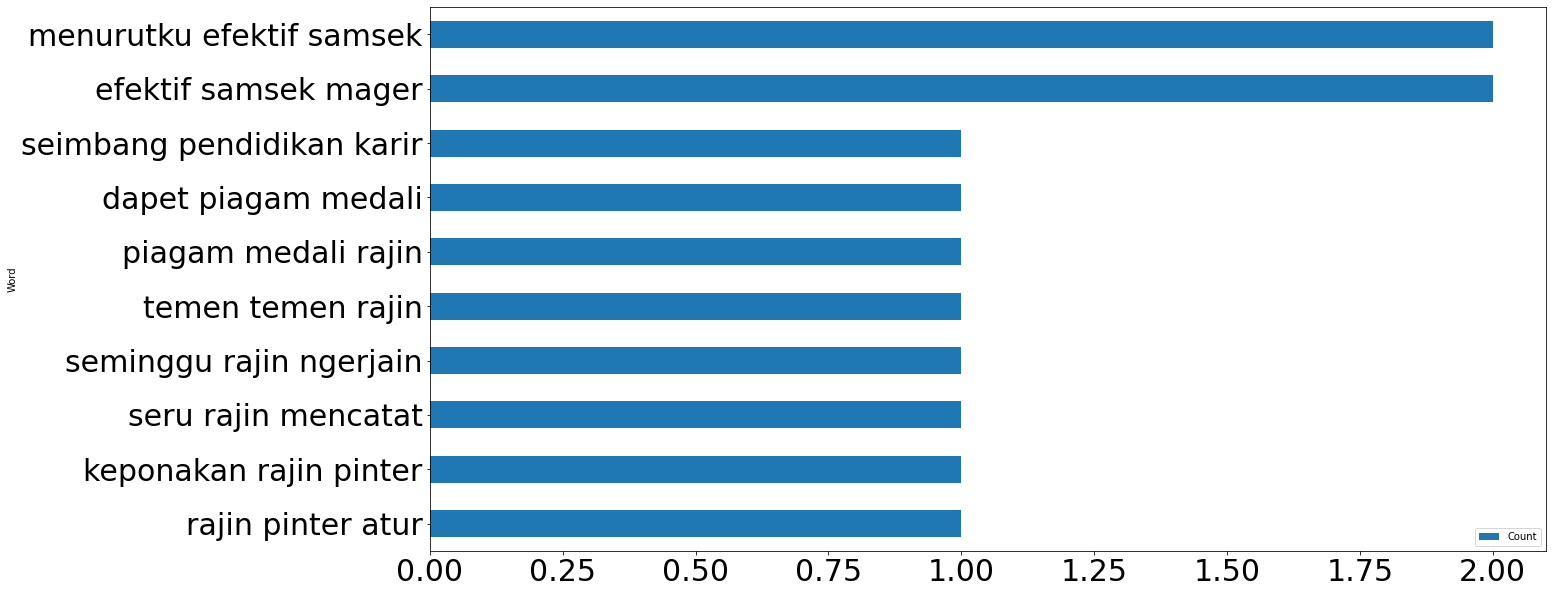

In [ ]:
df_top_positive_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('positif2.png',bbox_inches='tight')

Negative

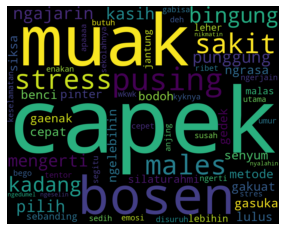

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NEG_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Unigrams
negative_unigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
         
df_top_negative = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative = df_top_negative.rename(columns={0:'Word',1:'Count'})

# Bigrams
negative_bigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        negative_bigrams[word] += 1
        
df_top_negative_bi = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_bi = df_top_negative_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
negative_trigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        negative_trigrams[word] += 1
        
df_top_negative_tri = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_tri = df_top_negative_tri.rename(columns={0:'Word',1:'Count'})


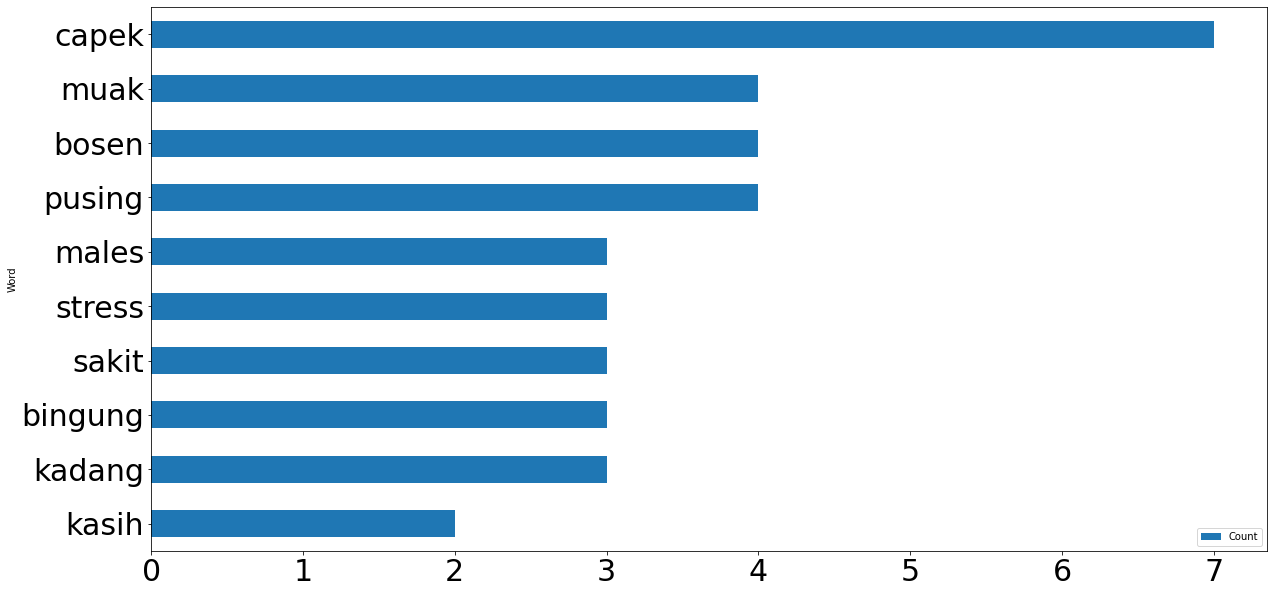

In [ ]:
df_top_negative.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('negatif.png',bbox_inches='tight')

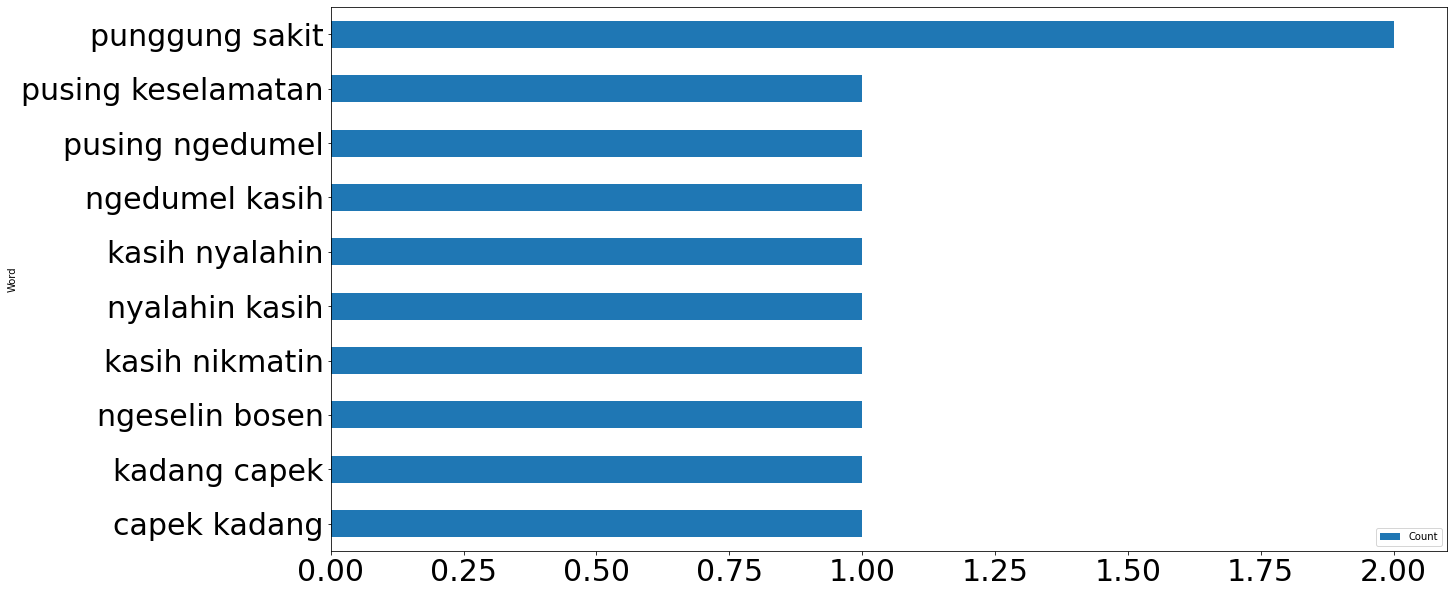

In [ ]:
df_top_negative_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('negatif1.png',bbox_inches='tight')

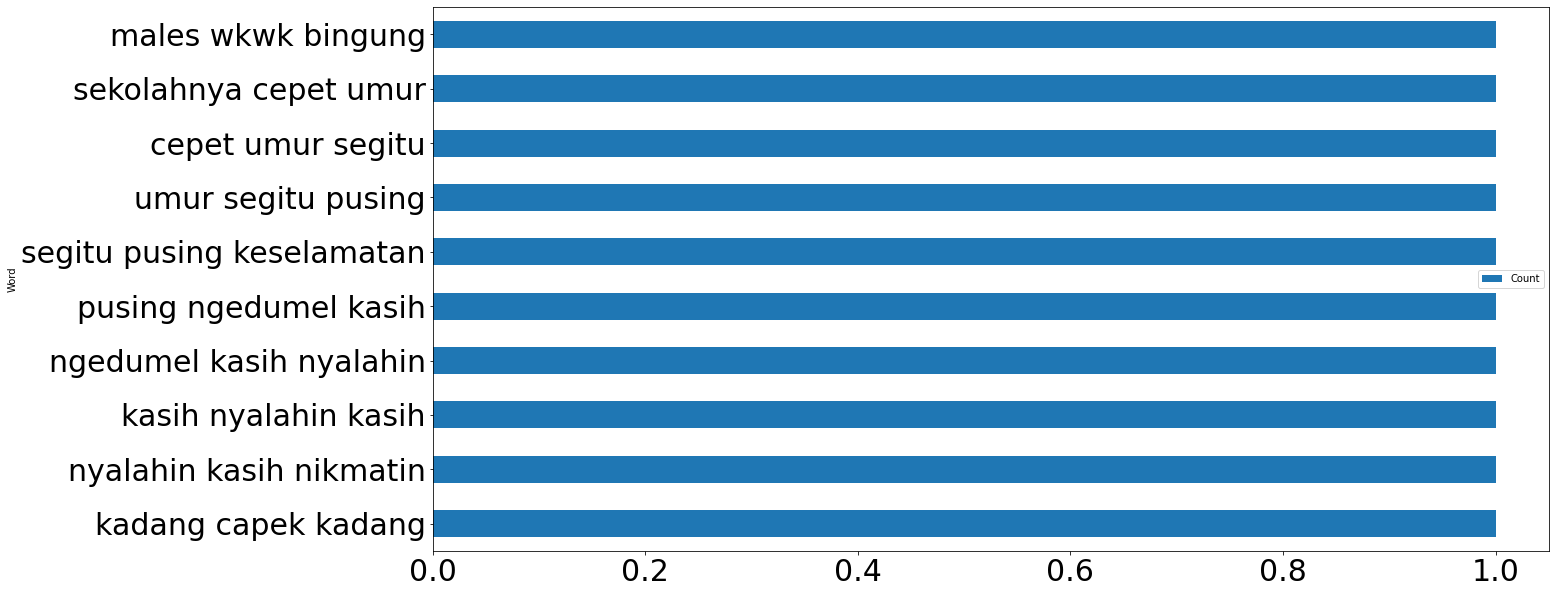

In [ ]:
df_top_negative_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('negatif2.png',bbox_inches='tight')

Netral

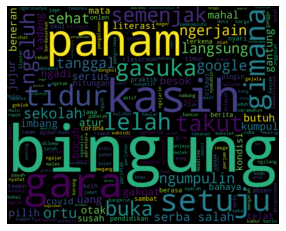

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NET_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Unigrams
neutral_unigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet):
        neutral_unigrams[word] += 1
         
df_top_neutral = pd.DataFrame(sorted(neutral_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral = df_top_neutral.rename(columns={0:'Word',1:'Count'})

# Bigrams
neutral_bigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        neutral_bigrams[word] += 1
        
df_top_neutral_bi = pd.DataFrame(sorted(neutral_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_bi = df_top_neutral_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
neutral_trigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        neutral_trigrams[word] += 1
        
df_top_neutral_tri = pd.DataFrame(sorted(neutral_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_tri = df_top_neutral_tri.rename(columns={0:'Word',1:'Count'})


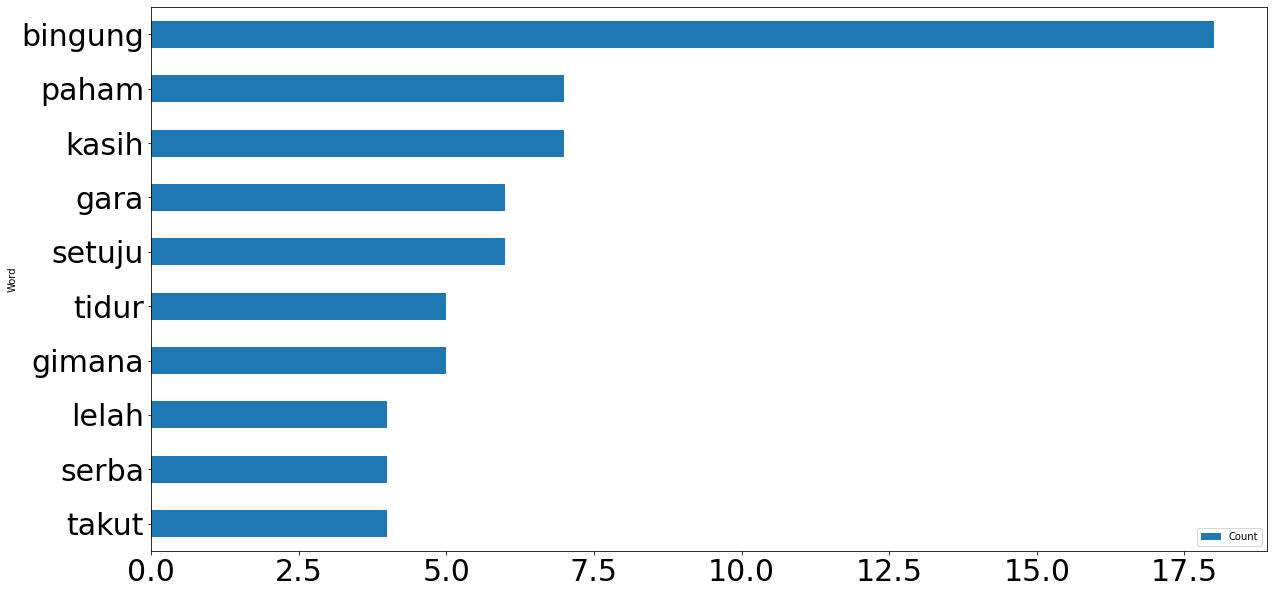

In [ ]:
df_top_neutral.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('netral.png',bbox_inches='tight')

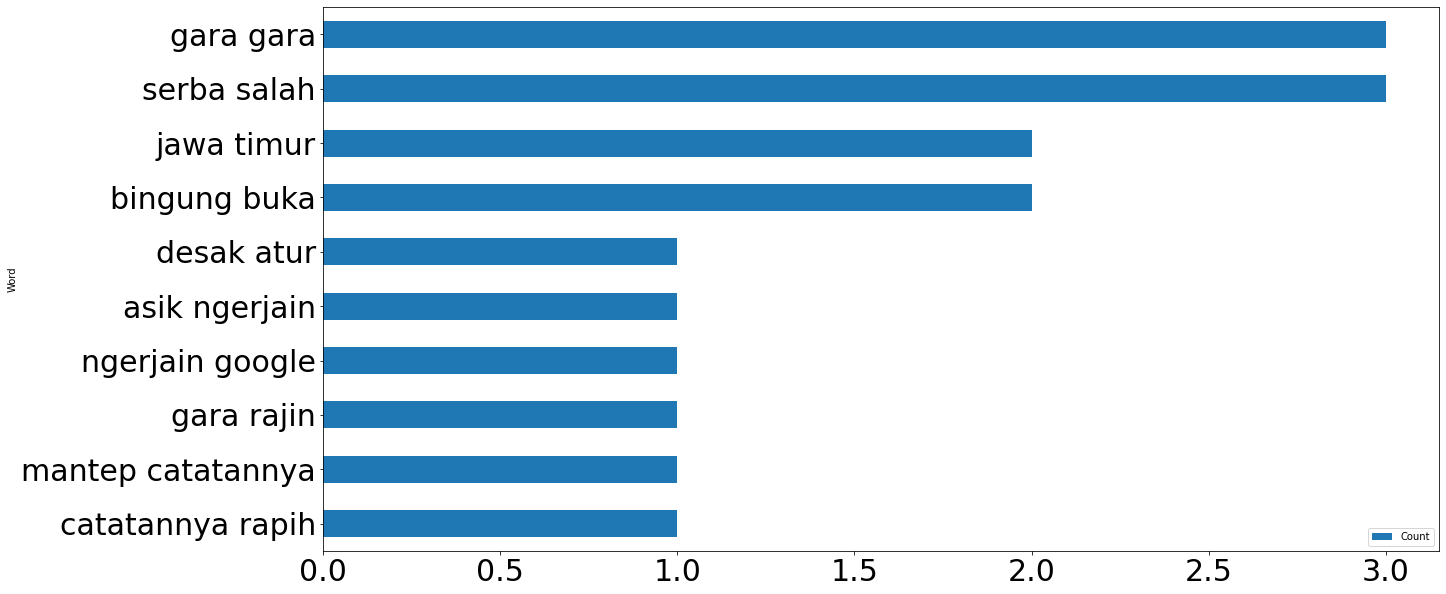

In [ ]:
df_top_neutral_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('netral2.png',bbox_inches='tight')

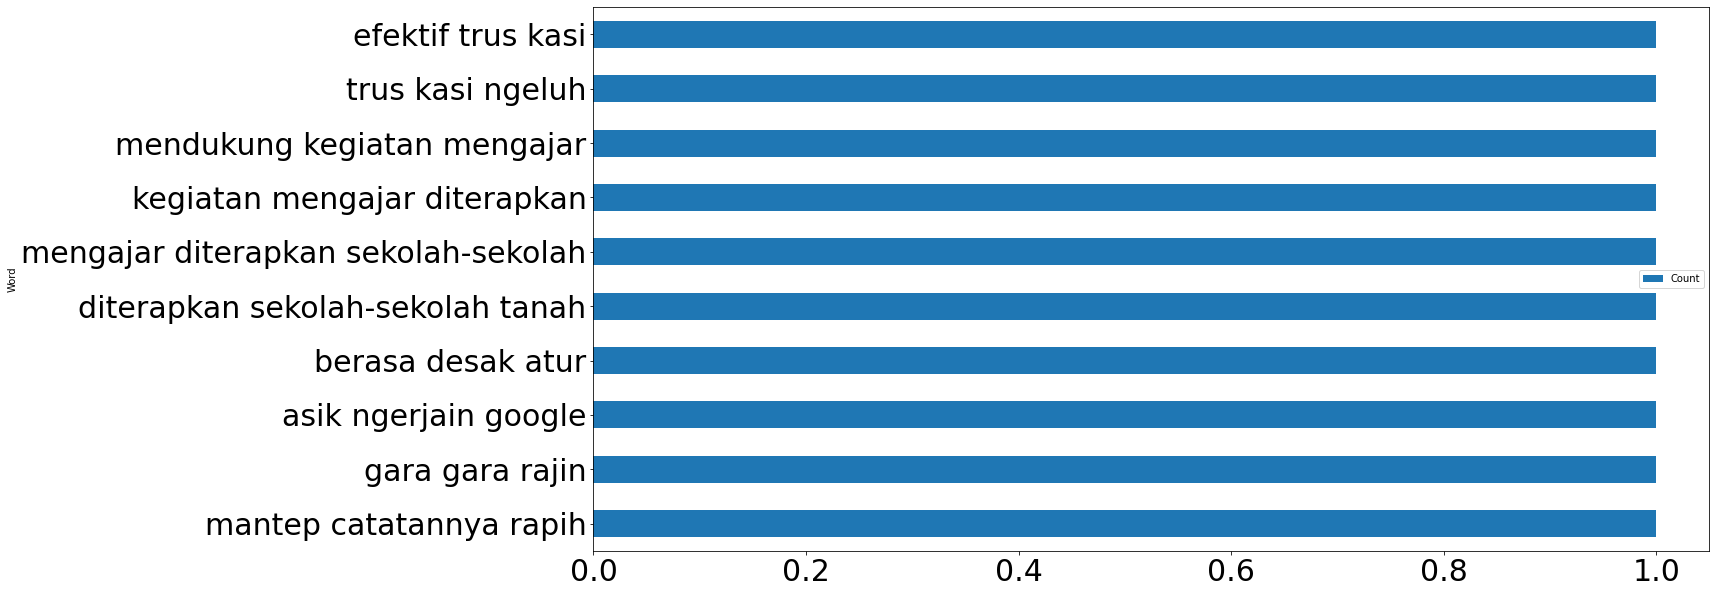

In [ ]:
df_top_neutral_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('netral3.png',bbox_inches='tight')